# Capstone: NYC Restaurant Inspections

Welcome to this course's capstone! This is an assignment where you will get to put together everything you learned in this course. 

Carefully read each Markdown (text) cell, which includes instructions and hints. Start by reading the background behind your upcoming tasks.

When you are done, submit your solution by saving it, then clicking on the blue submit button at the top of the page.

## Background:
You"re a data analyst at a consulting firm that helps restaurant owners optimize their business performance. You've been tasked with analyzing the relationship between restaurant characteristics (like cuisine type, location, price level) and their health inspection performance to provide actionable insights to your clients.

## In order for your submission to be graded correctly, you **MUST**:
* **Use the provided variable names**, otherwise the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** 

* **Only modify the cells that start with the comment `# GRADED CELL`**.  

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. 

To submit your solution, save it, then click on the blue submit button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 

</div>

## Table of Contents
- [Step 1: Loading the Modules](#step-1)
- [Step 2: Requesting the Data](#step-2)
    - [Getting Inspection Data](#getting-inspection-data)
        - [Exercise 1: Scraping Health Inspection Data](#ex1)
    - [Getting Restaurant Ratings and Information](#getting-restaurant-ratings-and-information)
        - [Exercise 2: Restaurant Ratings Collection](#ex2)
- [Step 3: Cleaning the Data](#step-3)
    - [Cleaning Inspections Data](#cleaning-inspections-data)
        - [Exercise 3: Convert Dates to Datetime](#ex3)
    - [Cleaning the Ratings Data](#cleaning-the-ratings-data)
        - [Exercise 4: Data Cleaning and Standardization](#ex4)
        - [Exercise 5: Convert to Correct Data Types](#ex5)
    - [Data Quality Analysis](#data-quality-analysis)
- [Step 5: Converting your Tables to SQL Databases](#step-5)
- [Step 6: Processing your Data with SQL](#step-4)
    - [Creating the Connection](#creating-the-connection)
    - [Getting Insights](#getting-insights)
        - [Exercise 6: Scores by Cuisine Types](#ex6)
        - [Exercise 7: Price Level Impact](#ex7)
        - [Exercise 8: Success Rates by Inspection Type](#ex8)

<a id="step-1"></a>

## Step 1: Loading the Modules

Begin by loading all the modules you will need for the lab.


<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to import the needed modules.</li>
        </ol>
</div>

In [1]:
# 🔒This cell is locked. You will not be able to edit it.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import requests
import os
from dotenv import load_dotenv

<a id="step-2"></a>

## Step 2: Requesting the Data

<a id="getting-inspection-data"></a>

### Getting Inspection Data

If you want to analyze health inspection scores and health violations in restaurants, you first need to get data to analyze.

<a id="ex3"></a>

#### Exercise 3: Scraping Health Inspection Data

You decide to get the Health Inspection results from the last 6 months of 2024. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Read the table provided in the [URL](https://dlai-lc-dag.s3.us-east-2.amazonaws.com/scraping_webpage_capstone/restaurant_inspections.html) to get a pandas DataFrame.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- Since the data is in table format, you can use the `pd.read_html()` function to retrieve the data
</ul>

</details>

In [2]:
# GRADED CELL: Exercise 1

url = "https://dlai-lc-dag.s3.us-east-2.amazonaws.com/restaurant_inspections.html"

### START CODE HERE ###

tables = pd.read_html(url)

### END CODE HERE ###

In [3]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results 
if len(tables) > 0:
    print("Downloaded tables successfully. Found a total of", len(tables), "tables.")
else:
    print("Could not find any tables")

Downloaded tables successfully. Found a total of 1 tables.


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
Downloaded tables successfully. Found a total of 1 tables.
```
</small>

</details>

If you were able to extract one table successfully, go ahead and save it in a DataFrame.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Run the cell below to save the one table recovered in a DataFrame named `inspections`.

</div>

In [4]:
# 🔒This cell is locked. You will not be able to edit it.

# get the table with the inspections
inspections = tables[0]

# inspect the first few rows
inspections.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50060054,SBARRO,Brooklyn,2509,FLATBUSH AVENUE,11234.0,7182583869,Pizza,07/01/2024,Violations were cited in the following area(s).,...,02/20/2025,Cycle Inspection / Initial Inspection,40.609174,-73.921785,318.0,46.0,69800.0,3326830.0,3.084700e+09,BK45
1,41305916,DUNKIN,Queens,13504,JAMAICA AVENUE,11418.0,7182629567,Donuts,07/01/2024,Violations were cited in the following area(s).,...,02/20/2025,Cycle Inspection / Initial Inspection,40.702394,-73.817640,409.0,29.0,14202.0,4442218.0,4.093420e+09,QN54


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex1.png" width="1000">
</details>

To understand what each column represents, you can take a look at [🔗this file](https://docs.google.com/spreadsheets/d/1UhME6JA90ckR5aHhydtFWjqa_1lRv9nw/edit?usp=sharing&ouid=112256844136506503376&rtpof=true&sd=true). For more general information about how the inspection system works and what each grade means, you can consult [🔗this other document](https://docs.google.com/document/d/1_lZYHizHeUxHZLsyYigs6bCwfVWiBlZ2/edit?usp=sharing&ouid=112256844136506503376&rtpof=true&sd=true). Both were downloaded from the NYC Open Data portal.

<a id="web-scraping-ratings-and-restaurant-information"></a>

### Getting Restaurant Ratings and Information

Next, since you're focusing on user ratings, you'll need to compile a detailed dataset with relevant restaurant information.

<a id="ex2"></a>

#### Exercise 2: Restaurant Ratings Collection

In order to gather information about different restaurants, you want to automatically gather information like ratings and services provided from online sources.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Load the environment variables.
2. Get the API key from the environment variable `"RESTAURANTS_API_KEY"` and save it into a variable.
3. Define the parameters for the request. You need to set up the "key" with the API key, and "limit" with the value 1000.
4. You will be using pagination to get the first 35,000 records. In each iteration:
    - Adjust the "offset" parameter, so you get new data each iteration.
    - Make the request.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- You can get the API key with the os.getenv() function. The argument for this function is the environment variable, in this case "RESTAURANTS_API_KEY".
- The parameters are a dictionary, in this case, you need to pass the "key", and "limit" parameters.
- In each iteration you will need to update the "offset" parameter. Remember you get 1000 records per iteration, so, for example, in the second iteration (`i=1`) you will need to skip 1000 records. In the third iteration (`i=2`) you will need to skip 2000=2*1000 iterations, and so on. 
- The request can be made using the requests.get() function. You need to provide as arguments the URL and the parameters dictionary.

</ul>

</details>


In [5]:
# GRADED CELL: Exercise 2

url_info = "https://2eraiuh.dlai.link/api/business_info"

errors_ratings = []

# load the environment variables
load_dotenv() 

### START CODE HERE ###

# load API key from environment variable
API_KEY = os.getenv("RESTAURANTS_API_KEY")

# define the parameters for the API request
params = { 
    "api_key": API_KEY,
    "limit": 1000,
    "offset": 0 
} 

### END CODE HERE ###

# create an empty list to store the dataframes
ratings_dataframes = [] 

# Iterate to get the first 35000 records of each source 
for i in range(35):

    ### START CODE HERE ###

    # update the offset parameter
    params["offset"] = i * 1000

    # request the data using requests
    response = requests.get(url_info, params)

    ### END CODE HERE ###
    
    if response.status_code == 200:
        # extract the JSON data, and get "data key"
        response_data = response.json()["data"]
        # convert to a DataFrame
        partial_df = pd.DataFrame(response_data)
        # append the partial dataframe to the list
        ratings_dataframes.append(partial_df)
    
    else:
        print("Failed to retrieve the general information data")
        errors_ratings.append(i)
        if "error" in response.json().keys():
            print(response.json()["error"])


# concatenate the dataframes
ratings_df = pd.concat(ratings_dataframes, ignore_index=True)

if len(errors_ratings) == 0:
    print("Ratings data retrieved successfully")

Ratings data retrieved successfully


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
Ratings data retrieved 
```
</small>

</details>

Visualize the first rows so you can understand the data you retrieved.

In [6]:
# 🔒This cell is locked. You will not be able to edit it.

# show the first 2 rows of the general information dataframe
ratings_df.head(2)

,address,name,place_id,price_level,rating,total_reviews,types
0,"114 E Burnside Ave, Bronx, NY 10453, United St...",San Lucas #2 Mexican Food,ChIJB9BYbbj1wokRJ24ZgjuZplM,$$,3.6,47.0,"restaurant, point_of_interest, food, establish..."
1,"238 Thompson St, New York, NY 10012, United St...",The Catholic Center at NYU,ChIJPWJOEJFZwokRX9iE7AMRQ0A,None,4.7,14.0,"church, place_of_worship, point_of_interest, e..."


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex2.png" width="900">
</details>

<a id="step-3"></a>

## Step 3: Cleaning the Data

Now that you have collected both customer feedback and inspection data, you need to ensure your insights will be accurate and reliable. As a Data Analyst, you can't recommend business improvements based on messy or inconsistent data.

<a id="cleaning-inspection-data"></a>

### Cleaning Inspections Data
Begin by cleaning the inspections data.

<a id="ex3"></a>

#### Exercise 3: Convert Dates to Datetime
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Standardize the column `"DBA"` (restaurant name): 
    - Given the name without any special characters, remove double spaces.
    
2. Convert columns `"INSPECTION DATE"`, `"GRADE DATE"` and `"RECORD DATE"` to datetime.

3. Split the `"INSPECTION TYPE"` column, and keep only the second part of the text. To do this, split the text in `"INSPECTION TYPE"` using the `/` character, and keep only the second part. Make sure to strip any leading or trailing spaces from the result before saving it.

4. Standardize the `"STREET"` column.
    - "AVENUE" → "AVE"
    - "STREET" → "ST"
    - "ROAD" → "RD"
    - "BOULEVARD" → "BLVD"
    - "DRIVE" → "DR"
    - "LANE" → "LN"
    - "COURT" → "CT"
    - "PLACE" → "PL"
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To convert columns to datetime, you can use the `pd.to_datetime()` function. Remember to overwrite the transformed values into the `inspections_clean` DataFrame.
- To adjust the `"INSPECTION TYPE":
    - Split the `"INSPECTION TYPE"` column using the `.str.split()` method.  
    - Select the second part of the split with `.str[<<desired index>>]`.
    - Strip the text of any leading and trailing white spaces using the `.str.strip()` method.
- Use `str.replace()` to replace the long names to their corresponding abbreviations.
</ul>

</details>


In [7]:
# GRADED CELL: Exercise 3

# create a copy of the inspections dataframe to clean it
# this is needed for grading purposes
inspections_clean = inspections.copy()

# define a pattern to identify special characters
special_char_pattern = r"[^A-Z0-9 ]" 

# replace any special characters with ""
inspections_clean["DBA"] = inspections_clean["DBA"].str.replace( 
                            special_char_pattern, "", regex=True) 

### START CODE HERE ###

# replace double white spaces ("  ") with a single space (" ")
inspections_clean["DBA"] = inspections_clean["DBA"].str.replace("  ", " ")

# convert the "INSPECTION DATE" column to datetime
inspections_clean["INSPECTION DATE"] = pd.to_datetime(inspections_clean["INSPECTION DATE"])

# convert the "GRADE DATE" column to datetime
inspections_clean["GRADE DATE"] = pd.to_datetime(inspections_clean["GRADE DATE"])

# convert the "RECORD DATE" column to datetime
inspections_clean["RECORD DATE"] = pd.to_datetime(inspections_clean["RECORD DATE"])

# split the "INSPECTION TYPE" column on the "/" character, and keep only the second part
inspections_clean["INSPECTION TYPE"] = inspections_clean["INSPECTION TYPE"].str.split("/").str[1].str.strip()

# lists of long names and abbreviations
long_names = ["AVENUE", "STREET", "ROAD", "BOULEVARD", "DRIVE", "LANE", "COURT", "PLACE"] 
abbreviations = ["AVE", "ST", "RD", "BLVD", "DR", "LN", "CT", "PL"] 

# iterate over the range of the list of long_names
for i in range(len(long_names)): # @KEEP
    inspections_clean["STREET"] = inspections_clean["STREET"].str.replace(long_names[i], abbreviations[i])

### END CODE HERE ###

# replace white spaces in column names
inspections_clean.columns = inspections_clean.columns.str.replace(" ", "_")

In [8]:
# 🔒This cell is locked. You will not be able to edit it.

# print the new data types
inspections_clean.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE_DESCRIPTION              object
INSPECTION_DATE          datetime64[ns]
ACTION                           object
VIOLATION_CODE                   object
VIOLATION_DESCRIPTION            object
CRITICAL_FLAG                    object
SCORE                           float64
GRADE                            object
GRADE_DATE               datetime64[ns]
RECORD_DATE              datetime64[ns]
INSPECTION_TYPE                  object
Latitude                        float64
Longitude                       float64
Community_Board                 float64
Council_District                float64
Census_Tract                    float64
BIN                             float64
BBL                             float64


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE_DESCRIPTION              object
INSPECTION_DATE          datetime64[ns]
ACTION                           object
VIOLATION_CODE                   object
VIOLATION_DESCRIPTION            object
CRITICAL_FLAG                    object
SCORE                           float64
GRADE                            object
GRADE_DATE               datetime64[ns]
RECORD_DATE              datetime64[ns]
INSPECTION_TYPE                  object
Latitude                        float64
Longitude                       float64
Community_Board                 float64
Council_District                float64
Census_Tract                    float64
BIN                             float64
BBL                             float64
NTA                              object
dtype: object
```
</small>


</details>

<a id="cleaning-general-information-and-details-data"></a>

### Cleaning the Ratings Data
<a id="ex4"></a>

#### Exercise 4: Data Cleaning and Standardization

In the case of user ratings data, some of the columns need a bit of cleaning. You will also need to handle missing values.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Run the next cell to clean the restaurant's name, so that the formatting matches the one in the inspections. 
2. Use the cell after that to convert the `"price_level"` column from the "\$" scale to a numeric scale:
    <br>    
    "\$\$\$\$\$→ 5, "\$\$\$\$" → 4, , "\$\$\$" → 3, "\$\$" → 2, "\$" → 1, " - No ratings yet" → 0
    <br>
    <strong>NOTE</strong>: You need to replace the scales in the order above (starting with "$$$$$" and ending with " - No ratings yet"), otherwise you will get wrong results.
3. Extract the Zip Code from the `"address"` column. The Zip Code corresponds to the 5 consecutive numbers after the state.

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To replace the "$" price scale into numeric, you can use `str.replace()` method. It is really important that you follow the order in the Directions.

- You need to map the `possible_price_level[i]` to the value `5-i` so that, for example, the first value "$$$$$" is assigned `5-0`, which is just five.

- To extract the Zip Code from the `"address"` column you can use the `str.extract()` method with the provided pattern. 

</ul>

</details>


In [9]:
# 🔒This cell is locked. You will not be able to edit it.

# make copies of the dataframe to save the cleaned version
ratings_clean = ratings_df.copy()

# data was collected via multiple queries; remove duplicate restaurants 
ratings_clean = ratings_clean.drop_duplicates()

# format name - this is the same structure as in Exercise 3
# convert the "name" column to uppercase 
ratings_clean["name"] = ratings_clean["name"].str.upper()

# remove any special characters using the special_char_pattern variable (replace them with "")
ratings_clean["name"] = ratings_clean["name"].str.replace( 
                            special_char_pattern, "", regex=True)

# replace double spaces ("  ") with a single space (" ")
ratings_clean["name"] = ratings_clean["name"].str.replace("  ", " ")

In [13]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# convert the "price_level" column from the "$" scale to a numeric scale
# define the possible rating values. Use the same order as in the Directions!
possible_price_level = ["$$$$$", "$$$$", "$$$", "$$", "$", " - No ratings yet"]

# iterate over the possible ratings indexes:
for i in range(len(possible_price_level)):
    # where the "price_level" column matches possible_price_level[i], replace it with the
    # 5 minus the index of the possible rating, casted as str
    ratings_clean["price_level"] = ratings_clean["price_level"].str.replace(possible_price_level[i], str(5-i))


# extract zip codes. the zip code is the last 5 digits of the "formatted_address" column
ratings_clean["zip_code"] = ratings_clean["address"].str.extract(r"(\d{5})")

### END CODE HERE ###

In [14]:
# 🔒This cell is locked. You will not be able to edit it.

ratings_clean.head(3)

,address,name,place_id,price_level,rating,total_reviews,types,zip_code
0,"114 E Burnside Ave, Bronx, NY 10453, United St...",SAN LUCAS 2 MEXICAN FOOD,ChIJB9BYbbj1wokRJ24ZgjuZplM,2,3.6,47.0,"restaurant, point_of_interest, food, establish...",10453
1,"238 Thompson St, New York, NY 10012, United St...",THE CATHOLIC CENTER AT NYU,ChIJPWJOEJFZwokRX9iE7AMRQ0A,None,4.7,14.0,"church, place_of_worship, point_of_interest, e...",10012
2,"150-29 Northern Blvd, Flushing, NY 11354, Unit...",HANYANG CHICKEN FLUSHING,ChIJPy7oSkVhwokRiCgXhYA7KBo,2,4.4,87.0,"restaurant, food, point_of_interest, establish...",11354


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex4.png" width="900">
</details>

<a id="ex4"></a>

#### Exercise 5: Convert to Correct Data Types
Last step in the data cleaning is to convert each column in the correct type.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
 1. Use the next cell to print the data types of each column.
 2. In the following cell, convert the data type of columns `price_level` and `zip_code` to `"Int64"`.
</div>



<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To convert columns to "Int64", you can use the `.astype()` method. Don't forget to overwrite the column in `ratings_clean`.
</ul>

</details>


In [15]:
# 🔒This cell is locked. You will not be able to edit it.

# print the data types before converting data types
print("Restaurant data types:")
print(ratings_clean.dtypes, "\n")

Restaurant data types:
address           object
name              object
place_id          object
price_level       object
rating           float64
total_reviews    float64
types             object
zip_code          object
dtype: object 



In [16]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

# convert the "price_level" column to "Int64" type
ratings_clean["price_level"] = ratings_clean["price_level"].astype("Int64")

# convert the "zip_code" column to "Int64" type
ratings_clean["zip_code"] = ratings_clean["zip_code"].astype("Int64")

### END CODE HERE ###

In [17]:
# print the data types to verify your changes
print("General information data types:")
print(ratings_clean.dtypes)

General information data types:
address           object
name              object
place_id          object
price_level        Int64
rating           float64
total_reviews    float64
types             object
zip_code           Int64
dtype: object



<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
General information data types:
address           object
name              object
place_id          object
price_level        Int64
rating           float64
total_reviews    float64
types             object
zip_code           Int64
dtype: object
```
</small>

</details>

Now that your data is clean, you can get some nice insights. For example, you can have a colored map showing the average rating and average score in each ZIP code.

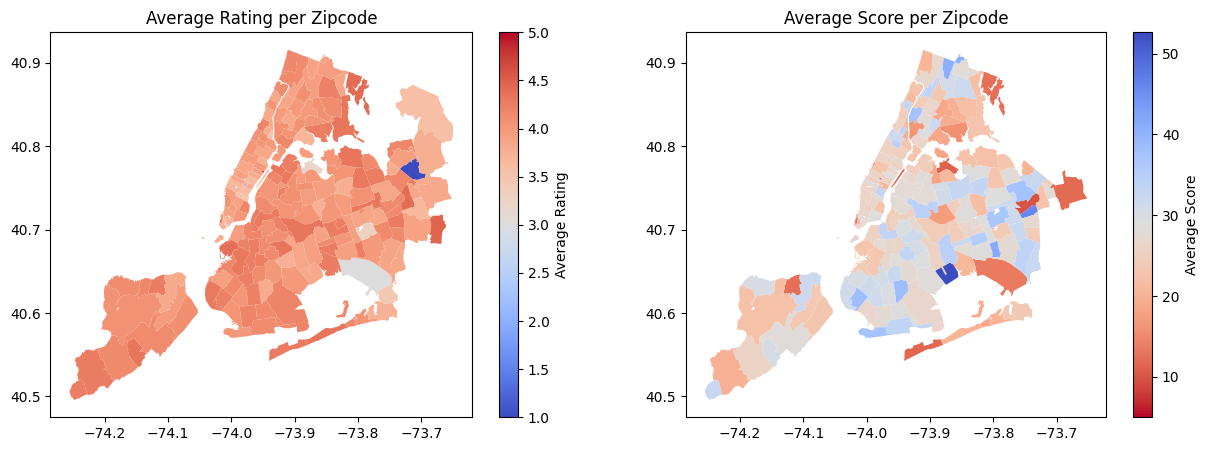

In [18]:
# 🔒This cell is locked. You will not be able to edit it.

# plot average rating and average score per zip code
import geopandas as gpd

# group by zip_code and calculate the average rating for each ZipCode
rating_by_zipcode = ratings_clean.groupby("zip_code")["rating"].mean().reset_index()

# group by zip_code and calculate the average SCORE for each ZipCode
score_by_zipcode = inspections.groupby("ZIPCODE")["SCORE"].mean().reset_index()

# load the shapefile with the map of New York zip codes
zipcodes_shapefile = gpd.read_file("maps/NY/NY-zipcodes.shp")
# rename the column to merge the dataframesq
zipcodes_shapefile.rename(columns={"ZCTA5CE20": "zip_code"}, inplace=True)
# convert the column to numeric
zipcodes_shapefile["zip_code"] = pd.to_numeric(zipcodes_shapefile["zip_code"])

# Merge the average ratings with the shapefile
merged_rating = zipcodes_shapefile.merge(rating_by_zipcode, left_on="zip_code", right_on="zip_code")
# merge the average score with the shapefile
merged_score = zipcodes_shapefile.merge(score_by_zipcode, left_on="zip_code", right_on="ZIPCODE")

# plot the maps
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
merged_rating.plot(column="rating", ax=ax[0], legend=True, cmap="coolwarm", vmin=1, vmax=5, legend_kwds={"label": "Average Rating"})
ax[0].set_title("Average Rating per Zipcode")
merged_score.plot(column="SCORE", ax=ax[1], legend=True, cmap="coolwarm_r", legend_kwds={"label": "Average Score"})
ax[1].set_title("Average Score per Zipcode")
plt.show()

Color scales are inverted in the two maps, so that in both maps red is good (better ratings and better grades), and blue is bad. Can you find any interesting patterns?

<a id="data-quality-analysis"></a>

### Data Quality Analysis

Before you continue, you will need to validate your data and clean it. Some restaurant reviews don't actually belong to the NYC area, and thus need to be removed from the dataset. 


<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Run the cell below to find the number of `ZipCodes` in `ratings_clean` which do not correspond to New York City, and remove them. NYC ZIP codes run from 10001 through 11697.

</div>

In [19]:
# 🔒This cell is locked. You will not be able to edit it.

# remove the zip code OOR values 
ratings_clean = ratings_clean[(ratings_clean["zip_code"] >= 10001) & (ratings_clean["zip_code"] <= 11697)]

<a id="step-5"></a>

## Step 5: Converting your tables to SQL Databases
Now that your data is cleaned and consistent, it is a good idea to save it in some data structure, so you can share it with your company, or work on it later on. An excellent choice are SQL databases. SQL allows for more efficient querying, especially with large datasets. You decide to convert your data into a SQLite database to process your findings.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Run the cell below to convert the ratings and inspection tables into a SQLite database. 
</div>

In [21]:
# 🔒This cell is locked. You will not be able to edit it.

# save to a database
# Create a connection to the SQLite database
connection = sqlite3.connect("restaurant_data.db")

# Save the DataFrames to the SQLite database
inspections_clean.to_sql("inspections", connection, if_exists="replace", index=False)
ratings_clean.to_sql("ratings", connection, if_exists="replace", index=False)


# Close the connection
connection.close()

print("DataFrames have been saved to the SQLite database 'restaurant_data.db'")

DataFrames have been saved to the SQLite database 'restaurant_data.db'


<a id="step-6"></a>

## Step 6: Processing your data with SQL

In order to process the data and create meaningful insights you will connect the SQL database you just created.

<a id="creating-the-connection"></a>

### Creating the Connection

Begin by creating a connection.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Run the cell below to connect to the SQLite database `"restaurant_data.db"`.
</div>

In [25]:
# 🔒This cell is locked. You will not be able to edit it.

# create a connection to the database
connection = sqlite3.connect("restaurant_data.db")

# test with a small query
query = """
SELECT * 
FROM ratings 
LIMIT 1
"""
pd.read_sql_query(query, connection)

,address,name,place_id,price_level,rating,total_reviews,types,zip_code
0,"114 E Burnside Ave, Bronx, NY 10453, United St...",SAN LUCAS 2 MEXICAN FOOD,ChIJB9BYbbj1wokRJ24ZgjuZplM,2,3.6,47.0,"restaurant, point_of_interest, food, establish...",10453


<a id="getting-insights"></a>

### Getting insights

<a id="ex6"></a>

#### Exercise 6: Scores by Cuisine Types

As a restaurant consultant, your clients often ask whether their cuisine type puts them at higher risk for health violations. You need to analyze inspection score patterns across different cuisines to provide targeted recommendations.

Remember that lower scores are better.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQLite query that:
    - Selects the `CUISINE_DESCRIPTION` column from the `inspections` table.
    - Groups the inspections by `CUISINE_DESCRIPTION`
    - Counts the total number of inspections per cuisine type. Use the alias `total_inspections`.
    - Orders the results by `avg_score` from lowest to highest.

2. Run the query.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To calculate average value you can use the `AVG()` function. You need to pass the column you wish to operate on as an argument.
- To count the number of elements, you can use the `COUNT()` function. 
- To segment by "CUISINE_DESCRIPTION", you can use the `GROUP BY` statement.
- To order the results, use the `ORDER BY` statement.

</ul>

</details>


In [27]:
# GRADED CELL: Exercise 6

### START CODE HERE ###

# write the query for the problem
query_score_by_type = """
SELECT CUISINE_DESCRIPTION, 
       COUNT(*) as total_inspections, 
       AVG(SCORE) as avg_score
FROM inspections
GROUP BY CUISINE_DESCRIPTION 
ORDER BY avg_score
"""
### END CODE HERE ###

# run the   query
scores_by_cuisine_df = pd.read_sql_query(query_score_by_type, connection)

In [28]:
# 🔒This cell is locked. You will not be able to edit it.

scores_by_cuisine_df.head()

,CUISINE_DESCRIPTION,total_inspections,avg_score
0,Portuguese,3,7.333333
1,Cajun,5,7.600000
2,Creole/Cajun,9,9.555556
3,Nuts/Confectionary,2,12.000000
4,Armenian,9,12.333333


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex6.png" width="350">
</details>

You can use this query to visualize the average score per cuisine type.

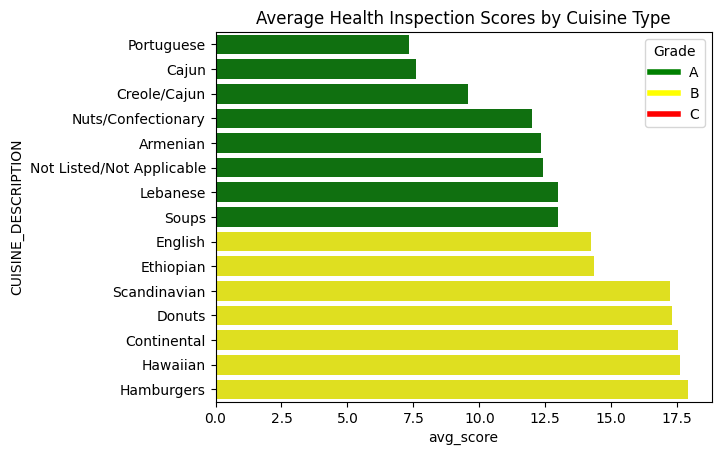

In [29]:
# 🔒This cell is locked. You will not be able to edit it.

# Define a function to assign grades based on the score
def assign_grade(score):
    if score < 14:
        return "A"
    elif 14 <= score <= 27:
        return "B"
    else:
        return "C"

# Apply the function to create a new column "grade"
scores_by_cuisine_df["grade"] = scores_by_cuisine_df["avg_score"].apply(assign_grade)

# Define a color palette for the grades
palette = {"A": "green", "B": "yellow", "C": "red"}

# Create the bar plot with colored bars
sns.barplot(data=scores_by_cuisine_df.head(15), x="avg_score", y="CUISINE_DESCRIPTION", hue="grade", palette=palette, dodge=False)
plt.title("Average Health Inspection Scores by Cuisine Type")

# Create a custom legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in palette.values()]
labels = palette.keys()
plt.legend(handles, labels, title="Grade")

plt.show()

<a id="ex 7"></a>

#### Exercise 7: Price Level Impact

Your team wants to understand if higher-priced restaurants actually maintain better health standards. This analysis will help you advise clients on whether investing more in their operations translates to better health compliance.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQLite query that:
    - Selects `DBA` (restaurant's name), `SCORE` and `INSPECTION_DATE` from the `inspections` table, and `price_level`, and `rating` from the `ratings` table.
    - You will see there is a `DISTINCT` clause inserted after `SELECT`. This is because the `DBA` column isn't unique in the `inspections` table.
    - Joins the `inspections` table with the `ratings` table. Since a brand can have more than one store on different location, you will need to join on two conditions:
        - `inspections.DBA` matches `ratings.name`.
        - `inspections.ZIPCODE` matches `ratings.zip_code`
    - Filters missing `price_level` values.
    - Orders the results by inspection score in descending order (highest scores first).
2. Run the query.

</div>

Remember that if you need any help with the query you can always ask an LLM for help. In this lab you have access to Coursera Coach <img src="imgs/cc.png" width=30>, but you can use the LLM you like the best.

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- Don't forget to add the `DISTINCT` statement after `SELECT`.
- To join the table, use the `JOIN` statement. To join tables by more than one criteria, use an `AND` statement between the join condition. It should look something like this:
    ```SQL
    FROM table1
    JOIN table2 ON table1.col1A = table2.col2A AND table1.col1B = table2.col2B
    ```
- To filter missing values you can use the `IS NOT NULL` clause.
- To order the results, use the `ORDER BY` statement, and indicate how you want the order (DESC).

</ul>

</details>


In [32]:
# GRADED CELL: Exercise 7

### START CODE HERE ###

# write the query for the problem. Begin with SELECT DISTINCT
query_score_by_price_level = """
SELECT DISTINCT inspections.DBA, 
                   inspections.SCORE, 
                   inspections.INSPECTION_DATE, 
                   ratings.price_level, 
                   ratings.rating 
FROM inspections JOIN ratings 
ON  inspections.DBA = ratings.NAME AND
    inspections.zipcode = ratings.zip_code
WHERE ratings.price_level IS NOT NULL
ORDER BY inspections.score DESC
"""
### END CODE HERE ###

# run the query
score_by_price_level_df = pd.read_sql_query(query_score_by_price_level, connection)

In [33]:
score_by_price_level_df.head()

,DBA,SCORE,INSPECTION_DATE,price_level,rating
0,FUSION EAST,131.0,2024-09-19 00:00:00,2,3.8
1,HALAL MUNCHIES,122.0,2024-10-07 00:00:00,1,4.6
2,PANNA II GARDEN INDIAN RESTAURANT,121.0,2024-07-24 00:00:00,1,3.5
3,CHEF 28,118.0,2024-08-01 00:00:00,2,3.9
4,HABANA OUTPOST,113.0,2024-09-25 00:00:00,1,4.6


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex7.png" width="550">
</details>

Text(0.5, 1.0, 'Health Inspection Scores by Price Level')

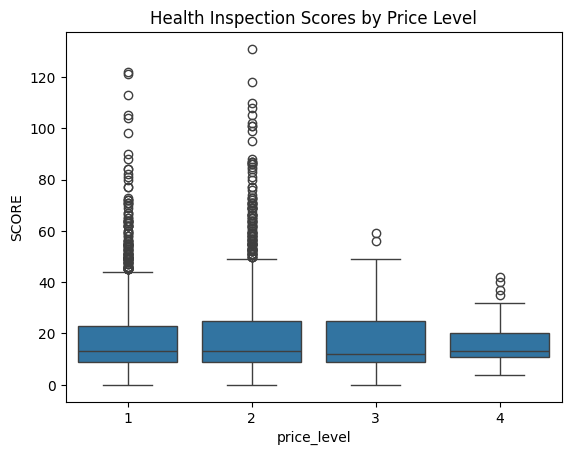

In [34]:
# 🔒This cell is locked. You will not be able to edit it.

# create a SCORE boxplot for each price level
sns.boxplot(data=score_by_price_level_df, x="price_level", y="SCORE")
plt.title("Health Inspection Scores by Price Level")

<a id="ex8"></a>

#### Exercise 8: Success Rates by Inspection Type
Your restaurant clients want to know which types of inspections they're most likely to fail, so they can better prepare. By analyzing success rates across different inspection types and programs, you'll help them focus their preparation efforts where they matter most.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Write a SQLite query that:

    - Selects the inspection type.
    - Counts the total number of inspections for each inspection type as "total_inspections".
    - Calculates the pass rate as a **percentage** (percentage of inspections with score ≤ 13) as  "pass_rate".
    - Calculates the average score for each inspection type as "avg_score".
    - Only includes records where the score is not null.
    - Groups the results by inspection type.
    - Orders the results by pass rate in descending order (highest pass rates first).
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To count the total number of restaurants, use the `COUNT()` statement. Don't forget to add the alias .
- You can use a `AVG(CASE WHEN ... THEN ... ELSE ... END)` expression get the rate of restaurants that passed the first inspection. Don't forget to multiply by 100 to get a percentage!

    Inside the sum function, you want to have the value 1 if the score is <=13, and 0 otherwise
- For the average score, you can use the `AVG()` function.
- To filter rows with an assigned score, you can use the `WHERE` statement. You are advised to use `NOT NULL` in the comparison
- To segment by `INSPECTION_TYPE`, you can use the `GROUP BY` statement.
- To sort the results, use the `ORDER BY` statement, and indicate how you want the order, ASC or DESC.
</ul>

</details>

In [35]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# write the query for the problem
query_success_rate = """
SELECT inspections.INSPECTION_TYPE, 
       COUNT(*) as total_inspections, 
       AVG(CASE WHEN SCORE <= 13 THEN 1 ELSE 0 END) * 100 as pass_rate, 
       AVG(SCORE) as avg_score 
FROM inspections 
WHERE SCORE IS NOT NULL 
GROUP BY INSPECTION_TYPE 
ORDER BY pass_rate DESC
"""
### END CODE HERE ###

success_rate_df = pd.read_sql_query(query_success_rate, connection)

In [36]:
success_rate_df.head()

,INSPECTION_TYPE,total_inspections,pass_rate,avg_score
0,Reopening Inspection,736,58.152174,16.722826
1,Re-inspection,13456,37.225030,27.152125
2,Initial Inspection,33171,34.237738,27.753037
3,Second Compliance Inspection,54,29.629630,30.648148
4,Compliance Inspection,643,17.729393,35.023328


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

<img src="imgs/ex8.png" width="500">
</details>

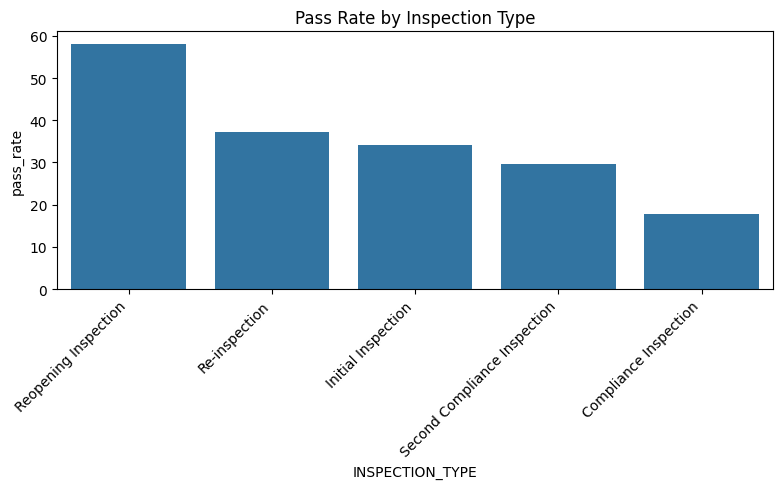

In [37]:
# 🔒This cell is locked. You will not be able to edit it.

plt.figure(figsize=(8, 5))
sns.barplot(data=success_rate_df, x="INSPECTION_TYPE", y="pass_rate")
plt.xticks(rotation=45, ha="right")
plt.title("Pass Rate by Inspection Type")
plt.tight_layout()

Finally, don't forget to close the connection!

In [38]:
# 🔒This cell is locked. You will not be able to edit it.

connection.close()

Congratulations on finishing this course's capstone! If everything is running correctly, you can go ahead and submit your code for grading.